# Read in Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy import stats
from scipy.stats import f_oneway

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_master_dataset.csv'
df = pd.read_csv(path)
df # should have 2,240,522 rows × 10 columns

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,Consulting
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,Consulting
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,Consulting
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,Consulting
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,Audit
...,...,...,...,...,...,...,...,...,...,...
2240517,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,Tax
2240518,9.665394e+13,1993,13-2011.00,0,1,0,0,0,0,0
2240519,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,Consulting
2240520,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,Audit


In [ ]:
# we see that some CEO focus have a value of 0 and that is because we do not have data
# from that year about the CEO. Lets see how many rows have 0

filtered_rows = df[df['CEO Focus'] == '0']
filtered_rows
# 332,967 rows have 0 in CEO focus, we can drop these rows since we want to
# know how the CEO focus impacts exit, lateral, promotion, and demotion

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
15,6.578000e+03,1995,13-1111.00,0,1,0,0,0,0,0
16,6.578000e+03,1996,13-1111.00,0,1,0,0,0,0,0
17,6.578000e+03,1997,13-1111.00,0,1,0,0,0,0,0
18,6.578000e+03,1998,13-1111.00,0,1,0,0,0,0,0
27,7.304000e+03,1995,13-1111.00,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2240507,6.502580e+13,1998,13-2041.00,0,1,0,0,0,0,0
2240512,7.387344e+13,1996,13-2031.00,1,0,0,0,0,0,0
2240513,8.894018e+13,1986,13-2031.00,1,0,0,0,0,0,0
2240515,7.971459e+13,1997,13-1031.02,1,0,0,0,0,0,0


In [ ]:
# drop rows
filtered_rows = df[df['CEO Focus'] != '0']  # Keep rows where 'CEO Focus' is not equal to '0'
df = filtered_rows
df # should have 2,240,522 - 332,967 = 1,907,555 rows, which we do so this is good

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,Consulting
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,Consulting
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,Consulting
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,Consulting
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,Audit
...,...,...,...,...,...,...,...,...,...,...
2240516,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,Consulting
2240517,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,Tax
2240519,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,Consulting
2240520,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,Audit


In [ ]:
# save new clean df to csv file
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_clean_master_dataset.csv'
df.to_csv(file_path, index=False)

In [ ]:
# reread clean df back in
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_clean_master_dataset.csv'
df = pd.read_csv(file_path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,Consulting
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,Consulting
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,Consulting
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,Consulting
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,Audit
...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,Consulting
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,Tax
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,Consulting
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,Audit


# Analysis

In [ ]:
# Calculate mean values of numerical variables grouped by 'CEO Focus' to understand the relationship
# between a categorical variable like 'CEO Focus' and numerical variables like 'Exit', 'Lateral', 'Promotion',
# and 'Demotion'

# calculate the mean values of numerical variables grouped by different categories of 'CEO Focus' to
# see if there are any differences in the means across the categories
mean_values = df.groupby('CEO Focus')[['Exit', 'Lateral', 'Promotion', 'Demotion']].mean()
mean_values

,Exit,Lateral,Promotion,Demotion
CEO Focus,,,,
Audit,0.081009,0.057708,0.019377,0.016968
Consulting,0.015726,0.036362,0.013102,0.011574
Tax,0.060501,0.077261,0.025749,0.023668


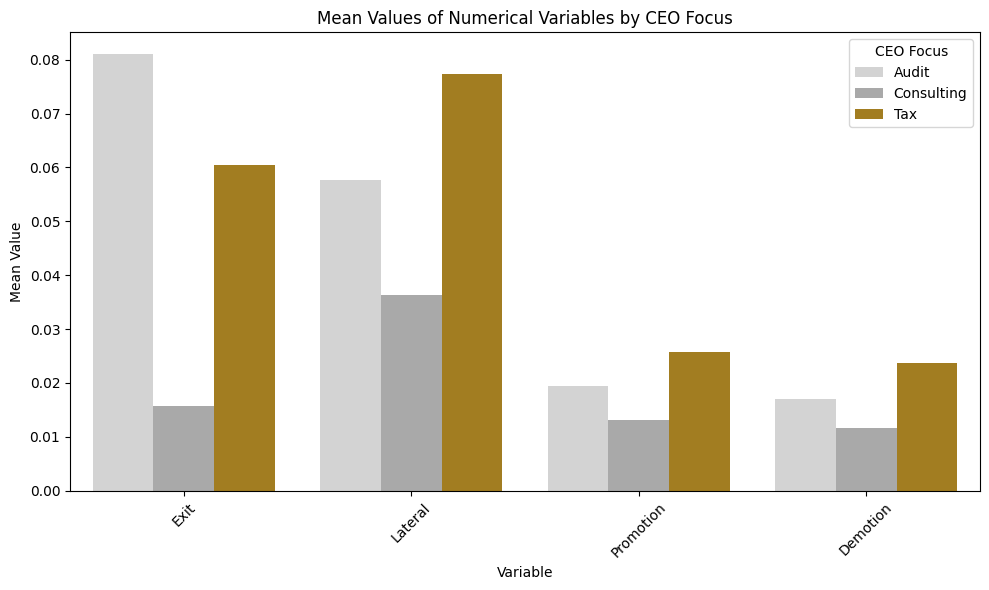

In [ ]:
# Visual display of the chart from previous code chunk
custom_palette = ['#D3D3D3', '#A9A9A9', '#B8860B']  # Light gray, gray, and dark gold

# reset the index to make 'CEO Focus' a column
mean_values.reset_index(inplace=True)

# melt the df to long format to plot easier
mean_values_long = pd.melt(mean_values, id_vars='CEO Focus', var_name='Variable', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_values_long, x='Variable', y='Mean Value', hue='CEO Focus', palette=custom_palette)
plt.title('Mean Values of Numerical Variables by CEO Focus')
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='CEO Focus')
plt.tight_layout()
plt.show()

## Time Series

<ipython-input-12-08896a69c939>:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


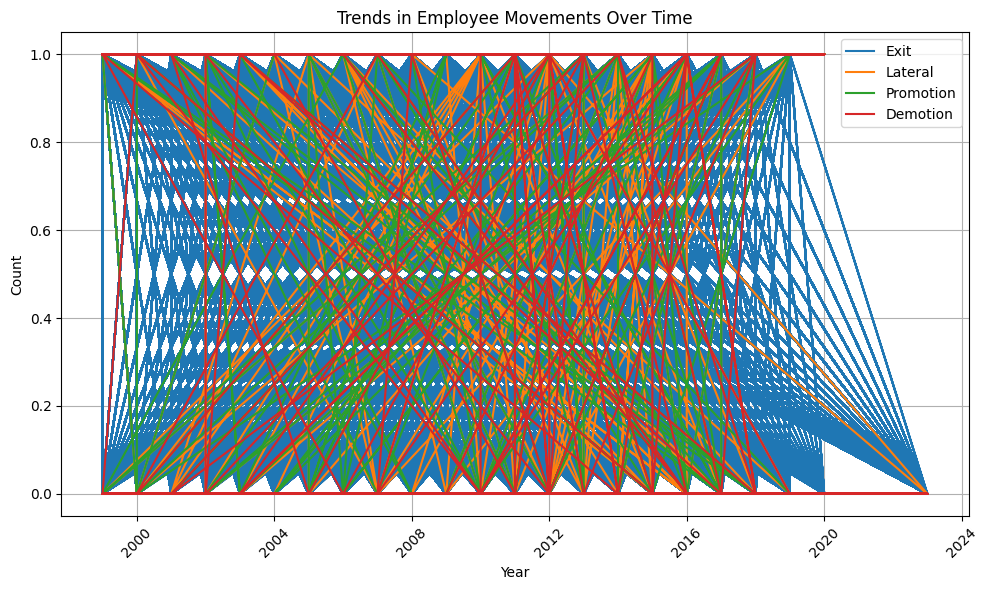

In [ ]:
# convert 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# plot trends of Exit, Lateral, Promotion, and Demotion over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Exit'], label='Exit')
plt.plot(df['Year'], df['Lateral'], label='Lateral')
plt.plot(df['Year'], df['Promotion'], label='Promotion')
plt.plot(df['Year'], df['Demotion'], label='Demotion')
plt.title('Trends in Employee Movements Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hard to read, retry another graph approach

<Figure size 1000x600 with 0 Axes>

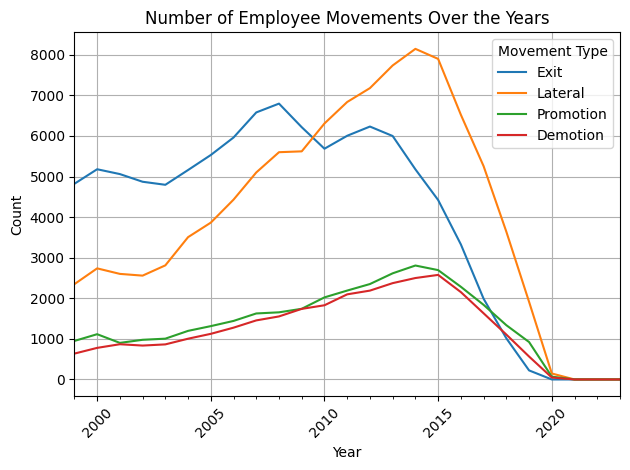

In [ ]:
# group the data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')
plt.title('Number of Employee Movements Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Movement Type')
plt.show()

Add a vertical line when a new ceo comes in.

In [ ]:
# Read in ceo data to try and add to plot
# File path
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Big 4 CEO Dataset.xlsx'
ceo = pd.read_excel(file_path)
ceo

,Name,Firm,Tenure Start,Tenure End,Tenure Years,Employment History (Audit or Consulting),Terms
0,Joe Ucuzoglu,Deloitte,2022,2023,1,Audit,1
1,Punit Renjen,Deloitte,2015,2022,8,Consulting,2
2,Barry Salzberg,Deloitte,2011,2015,4,Tax,1
3,James Quigley,Deloitte,2007,2011,4,Audit,1
4,William Parrett,Deloitte,2003,2007,4,Audit,1
5,James Copeland,Deloitte,1999,2003,4,Audit,1
6,William Thomas,KPMG,2017,2023,6,Audit,2
7,John Veihmeyer,KPMG,2014,2017,3,Audit,1
8,Michael Andrew,KPMG,2011,2014,3,Tax,1
9,Timothy Flynn,KPMG,2007,2011,3,Audit,1


In [ ]:
# only want deloitte ceo data
ceo_deloitte = ceo[ceo['Firm'] == 'Deloitte']
ceo_deloitte

,Name,Firm,Tenure Start,Tenure End,Tenure Years,Employment History (Audit or Consulting),Terms
0,Joe Ucuzoglu,Deloitte,2022,2023,1,Audit,1
1,Punit Renjen,Deloitte,2015,2022,8,Consulting,2
2,Barry Salzberg,Deloitte,2011,2015,4,Tax,1
3,James Quigley,Deloitte,2007,2011,4,Audit,1
4,William Parrett,Deloitte,2003,2007,4,Audit,1
5,James Copeland,Deloitte,1999,2003,4,Audit,1


<Figure size 1000x600 with 0 Axes>

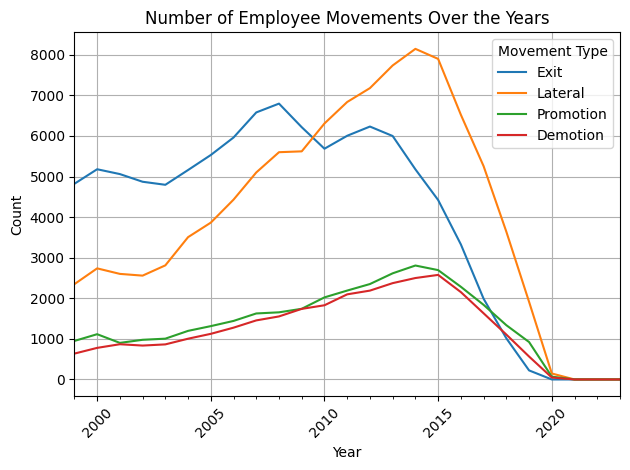

In [ ]:
# group the data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')
plt.title('Number of Employee Movements Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# add vertical lines for CEO tenure start and note of what focus they are
for idx, row in ceo_deloitte.iterrows():
    plt.axvline(x=row['Tenure Start'], color='black', linestyle='--', linewidth=1)
    #plt.text(row['Tenure Start'], 100, row['Employment History (Audit or Consulting)'], rotation=90, va='bottom')

plt.legend(title='Movement Type')
plt.show()

0
Name                                        Joe Ucuzoglu
Firm                                            Deloitte
Tenure Start                                        2022
Tenure End                                          2023
Tenure Years                                           1
Employment History (Audit or Consulting)           Audit
Terms                                                  1
Name: 0, dtype: object
1
Name                                        Punit Renjen
Firm                                            Deloitte
Tenure Start                                        2015
Tenure End                                          2022
Tenure Years                                           8
Employment History (Audit or Consulting)      Consulting
Terms                                                  2
Name: 1, dtype: object
2
Name                                        Barry Salzberg
Firm                                              Deloitte
Tenure Start                    

<Figure size 1000x600 with 0 Axes>

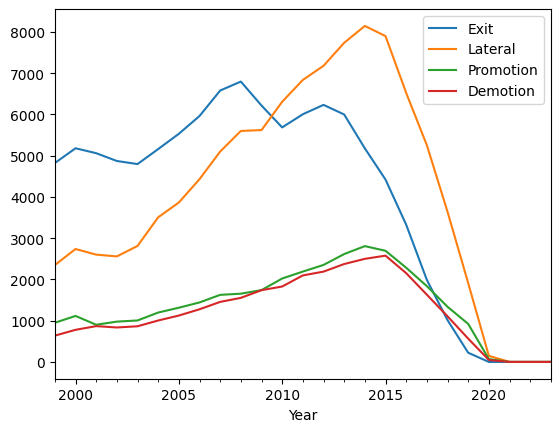

In [ ]:
# group the movement data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')

# add vertical lines for when CEO changes
for index, row in ceo_deloitte.iterrows():
    plt.axvline(x=row['Tenure Start'], color='red', linestyle='--', label='CEO Change' if index == 0 else None)
    print(index)
    print(row)

#plt.title('Number of Employee Movements Over the Years with CEO Changes')
#plt.xlabel('Year')
#plt.ylabel('Count')
#plt.grid(True)
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.legend(title='Movement Type')
#plt.show()

<Figure size 1000x600 with 0 Axes>

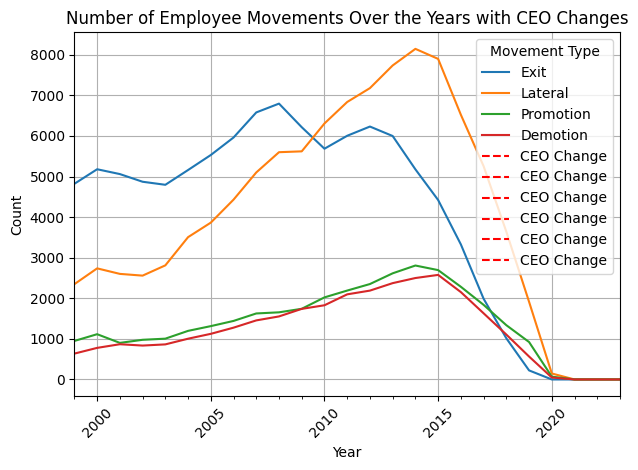

In [ ]:
# group the movement data by year and sum the counts
yearly_counts = df.groupby('Year')[['Exit', 'Lateral', 'Promotion', 'Demotion']].sum()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='line', linestyle='-')

# add vertical lines for when CEO changes
for index, row in ceo_deloitte.iterrows():
    plt.axvline(x=row['Tenure Start'], color='red', linestyle='--', label='CEO Change')

plt.title('Number of Employee Movements Over the Years with CEO Changes')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Movement Type')
plt.show()

Need to fix this chart. Not producing correct outcome. Want to see vertical lines for the years a new CEO comes in.

## ANOVA (Group Differences)

In [ ]:
# anova tests to see if differences between CEO focus on promotion, exit, demotion, and lateral moves

# group by CEO Focus
grouped = df.groupby('CEO Focus')

# calculate proportions
proportions = grouped[['Exit', 'Promotion', 'Lateral', 'Demotion']].mean()

# one-way ANOVA for each column
for column in proportions.columns:
    print(f"\n\nOne-way ANOVA for {column}:\n")
    # get data for each CEO Focus group
    group_data = [grouped.get_group(focus)[column] for focus in proportions.index]
    # perform one-way ANOVA
    f_stat, p_value = f_oneway(*group_data)
    print(f"One-way ANOVA for {column}: F-statistic={f_stat}, p-value={p_value}")



One-way ANOVA for Exit:

One-way ANOVA for Exit: F-statistic=16599.47088662348, p-value=0.0


One-way ANOVA for Promotion:

One-way ANOVA for Promotion: F-statistic=1145.3979585019883, p-value=0.0


One-way ANOVA for Lateral:

One-way ANOVA for Lateral: F-statistic=4313.983320013652, p-value=0.0


One-way ANOVA for Demotion:

One-way ANOVA for Demotion: F-statistic=1149.9426173502854, p-value=0.0


The p-value indicates the probability of obtaining the observed results if the null hypothesis is true. In the context of one-way ANOVA:

*   Null Hypothesis (H0): There is no significant difference among the means of the groups.

*   Alternative Hypothesis (H1): There is a significant difference among the means of the groups.

All ANOVA tests have a p-value of 0 which suggests that the observed data is so extreme that it is impossible to obtain under the assumption that there is no difference between the groups being compared. In practical terms, this would imply strong evidence against the null hypothesis. This supports the alternative hypothesis that there are significant differences among the means of the groups for Exit, Promotion, Lateral, and Demotion.

## Rolling Frequencies

In [ ]:
# After 3,4, or 6 months after a new CEO comes in look at how many people are classifying as consulting or auditing AND
# look at how many people have a promotion, exit, demotion, or lateral move.

# get CEO tenure start years
ceo_tenure_start_years = ceo_deloitte['Tenure Start']

# define the months after CEO tenure start
months_after_ceo_tenure = [3, 4, 6]

# analyze movements (promotion, demotion, exit, lateral) after 3,4,6 months for each CEO
# rolling counts
for tenure_start_year in ceo_tenure_start_years:
    print("\n")
    print(f"Analysis after CEO tenure start in {tenure_start_year}:")
    for months in months_after_ceo_tenure:
        end_year = tenure_start_year + (months // 12)
        end_month = (tenure_start_year % 12) + (months % 12)
        if end_month > 12:
            end_year += 1
            end_month -= 12

        filtered_data = df[(df['Year'].dt.year > tenure_start_year) & (df['Year'].dt.year <= end_year)]

        promotions = filtered_data['Promotion'].sum()
        exits = filtered_data['Exit'].sum()
        demotions = filtered_data['Demotion'].sum()
        lateral_moves = filtered_data['Lateral'].sum()

        consulting_count = filtered_data[filtered_data['CEO Focus'] == 'Consulting'].shape[0]
        audit_count = filtered_data[filtered_data['CEO Focus'] == 'Audit'].shape[0]

        print(f"After {months} months:")
        print("---------------")
        print(f"Promotions: {promotions}")
        print(f"Exits: {exits}")
        print(f"Demotions: {demotions}")
        print(f"Lateral Moves: {lateral_moves}")
        print(f"Consulting Count: {consulting_count}")
        print(f"Audit Count: {audit_count}")
        print("\n")



Analysis after CEO tenure start in 2022:
After 3 months:
---------------
Promotions: 0
Exits: 0
Demotions: 0
Lateral Moves: 0
Consulting Count: 0
Audit Count: 0


After 4 months:
---------------
Promotions: 0
Exits: 0
Demotions: 0
Lateral Moves: 0
Consulting Count: 0
Audit Count: 0


After 6 months:
---------------
Promotions: 0
Exits: 0
Demotions: 0
Lateral Moves: 0
Consulting Count: 0
Audit Count: 0




Analysis after CEO tenure start in 2015:
After 3 months:
---------------
Promotions: 2283
Exits: 3327
Demotions: 2152
Lateral Moves: 6521
Consulting Count: 109440
Audit Count: 0


After 4 months:
---------------
Promotions: 2283
Exits: 3327
Demotions: 2152
Lateral Moves: 6521
Consulting Count: 109440
Audit Count: 0


After 6 months:
---------------
Promotions: 2283
Exits: 3327
Demotions: 2152
Lateral Moves: 6521
Consulting Count: 109440
Audit Count: 0




Analysis after CEO tenure start in 2011:
After 3 months:
---------------
Promotions: 0
Exits: 0
Demotions: 0
Lateral Moves: 0
Con

# Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
# Need to reread df in so have all columns
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_clean_master_dataset.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,Consulting
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,Consulting
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,Consulting
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,Consulting
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,Audit
...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,Consulting
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,Tax
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,Consulting
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,Audit


In [ ]:
# need to create an indictor if it is a lateral move within Deloitte so this means
# exit = 0 and lateral = 1 at the same time
def calc_lateral_within(row):
    if row['Exit'] == 0 and row['Lateral'] == 1:
        return 1
    else:
        return 0

# apply the function to the df
df['lateral_within'] = df.apply(calc_lateral_within, axis=1)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus,lateral_within
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,Consulting,0
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,Consulting,0
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,Consulting,0
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,Consulting,0
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,Consulting,0
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,Audit,0


In [ ]:
# lets spot check some rows and see where lateral_within = 1

lateral_within_rows = df[df['lateral_within'] == 1]
# lateral_within_rows = df[df['Promotion'] == 1]
# lateral_within_rows = df[(df['lateral_within'] == 0) & (df['Promotion'] == 1)]
lateral_within_rows

# everything looks good

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus,lateral_within
625683,8.589935e+09,2010,13-2011.02,0,1,0,1,0,0,Audit,1
625684,8.589938e+09,2016,13-2011.02,0,1,0,1,0,0,Consulting,1
625686,3.435974e+10,2012,13-2011.02,1,0,0,1,0,0,Tax,1
625688,6.871948e+10,2015,13-2011.02,1,0,0,1,0,0,Consulting,1
625690,1.374390e+11,2010,13-2011.02,0,1,0,1,0,0,Audit,1
...,...,...,...,...,...,...,...,...,...,...,...
1907414,2.927450e+13,2006,13-1199.01,0,1,0,1,0,0,Audit,1
1907415,4.033833e+13,2014,13-1199.01,0,1,0,1,0,0,Tax,1
1907416,4.198760e+13,2015,13-1199.01,0,1,0,1,0,0,Consulting,1
1907417,5.531059e+13,2001,13-1199.01,0,1,0,1,0,0,Audit,1


In [ ]:
# create another indicator variable (0/1), where the variable takes the value
# of one if the employee and CEO share the same focus, zero otherwise.

# function to apply to each row
def create_shared_column(row):
    if row['Audit_History'] == 1 and row['CEO Focus'] == 'Audit':
        return 1
    elif row['Consult_History'] == 1 and row['CEO Focus'] == 'Consulting':
        return 1
    else:
        return 0

df['Shared_Focus'] = df.apply(create_shared_column, axis=1)
df.head()

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,CEO Focus,lateral_within,Shared_Focus
0,36.0,2018,13-1111.00,0,1,0,0,0,0,Consulting,0,1
1,36.0,2019,13-1111.00,0,1,0,0,0,0,Consulting,0,1
2,36.0,2020,13-1111.00,0,1,0,0,0,0,Consulting,0,1
3,36.0,2021,13-1111.00,0,1,0,0,0,0,Consulting,0,1
4,36.0,2022,13-1111.00,0,1,0,0,0,0,Audit,0,0


In [ ]:
# rearrenge order of columns
desired_column_order = ['ID', 'Year','ONET', 'Audit_History', 'Consult_History', 'Exit', 'Lateral', 'Promotion', 'Demotion','lateral_within', 'CEO Focus','Shared_Focus']
df = df[desired_column_order]
df # inspect df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,0,Consulting,1
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,0,Audit,0


In [ ]:
df_consult = df[df['Consult_History'] == 1]
df_consult
# validate the fuction worked good, yes all good

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907542,9.271975e+13,2009,11-2021.00,0,1,0,0,0,0,0,Audit,0
1907543,9.271975e+13,2010,11-2021.00,0,1,0,0,0,0,0,Audit,0
1907546,6.556697e+13,2006,13-2099.02,0,1,0,0,0,0,0,Audit,0
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,0,Consulting,1


In [ ]:
unique_counts = df.nunique() # Get the number of unique values in each column
unique_counts

ID                 189722
Year                   25
ONET                   29
Audit_History           2
Consult_History         2
Exit                    2
Lateral                 2
Promotion               2
Demotion                2
lateral_within          2
CEO Focus               3
Shared_Focus            2
dtype: int64

In [ ]:
# save to df to csv file so no need to rerun all above cells
csv_file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_master_dataset_v2.csv'
df.to_csv(csv_file_path, index=False)

In [ ]:
# Read back in to df
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,0,Consulting,1
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,0,Audit,0


In [ ]:
# make sure data in right data type to do regression
df.dtypes

ID                 float64
Year                 int64
ONET                object
Audit_History        int64
Consult_History      int64
Exit                 int64
Lateral              int64
Promotion            int64
Demotion             int64
lateral_within       int64
CEO Focus           object
Shared_Focus         int64
dtype: object

In [ ]:
# Getting error when doing regression so need to change data type for ONET because needs to be numeric
# Remove non-numeric characters from the onet column
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

df.dtypes # sanity check

ID                 float64
Year                 int64
ONET               float64
Audit_History        int64
Consult_History      int64
Exit                 int64
Lateral              int64
Promotion            int64
Demotion             int64
lateral_within       int64
CEO Focus           object
Shared_Focus         int64
dtype: object

In [ ]:
df # data still looks good, so can start regression now

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13111100.0,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13111100.0,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13111100.0,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13111100.0,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13111100.0,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15119910.0,0,1,0,0,0,0,0,Consulting,1
1907551,8.839043e+13,2011,13103100.0,1,0,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13201100.0,1,0,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13103100.0,0,1,0,0,0,0,0,Audit,0


## Exit

The regression in mind is: Exit indicator = intercept + same focus + Fixed Effects. The fixed effects would include: 1) occupation and 2) year. Will leave everything at the individual-year level at this point because we may want to try individual fixed effects as well. Also double-clustered the standard errors at the occupation and year levels. After running it with the exit indicator as the dependent variable, we will also see what happens with Promotion, Lateral, Demotion, and Lateral-within.  

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Generate dummy variables for fixed effects
fe_dummies_exit = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_exit = pd.concat([df[['Shared_Focus']], fe_dummies_exit], axis=1)

# Add a constant to the model
X_exit = sm.add_constant(X_exit)

# Dependent variable
Y_exit = df['Exit']

# Fit the OLS model
model_exit = sm.OLS(Y_exit, X_exit)

#results_exit = model_exit.fit(cov_type='cluster', cov_kwds={'groups_exit': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
# Prepare groups_exit for clustering
groups_exit = df['ONET'].astype(str) + '_' + df['Year'].astype(str) # Combining ONET and Year into a single group identifier

# Fit the model with double-clustered standard errors
results_exit = model_exit.fit(cov_type='cluster', cov_kwds={'groups': groups_exit})
# results_exit = model_exit.fit() # since clustering was not working just fit the model without clustering

results_exit.summary()

# The coefficient for the Shared_Focus variable is -0.0060 (negative).
# Since the coefficient is negative, it suggests that an increase in
# Shared_Focus is associated with a decrease in the likelihood of Exit.
# The p-value associated with the Shared_Focus variable is 0.426.
# This p-value represents the probability of observing a coefficient as
# extreme as the one obtained in the sample data, assuming that the null
# hypothesis is true (i.e., assuming that there is no true relationship between Shared_Focus and Exit).
# A common threshold for determining significance is a p-value of 0.05 or less.
# If the p-value is less than 0.05, it is generally considered statistically significant,
# suggesting that there is evidence to reject the null hypothesis. Conversely,
# if the p-value is greater than 0.05, it is not statistically significant,
# indicating that there is not enough evidence to reject the null hypothesis.
# In this case, the p-value for the Shared_Focus variable is 0.426, which is greater than 0.05.
# Therefore, it is not statistically significant at the conventional significance level.
# This suggests that there is not enough evidence to conclude that there is a significant
# relationship between CEO shared focus and the likelihood of exit.
# Based on the results, the Shared_Focus variable does not appear to have a
# significant impact on the likelihood of exit, as the p-value is not statistically
# significant.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exit   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     31.09
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.16e-13
Time:                        04:09:23   Log-Likelihood:             1.4744e+05
No. Observations:             1907555   AIC:                        -2.949e+05
Df Residuals:                 1907551   BIC:                        -2.948e+05
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.553e-06   8.22e-06      0.797      0.425   -9.56e-06    2.27e-05
Shared_Focus    -0.0060      0.008     -0.795      0.426      -0.021       0.009
ID             5.13e-17   1.01e-17      5.084      0.000    3.15e-17    7.11e-17
ONET         -6.654e-11   2.85e-10     -0.234      0.815   -6.25e-10    4.92e-10
Year          2.667e-05    3.4e-06      7.852      0.000       2e-05    3.33e-05
==============================================================================
Omnibus:                  1505177.970   Durbin-Watson:                   0.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20484515.650
Skew:                           3.991   Prob(JB):                         0.00
Kurtosis:                      16.929   Cond. No.                     1.81e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.81e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Lateral

In [ ]:
# Need to reread df in so have all columns
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,0,Consulting,1
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,0,Audit,0


In [ ]:
# need to do same thing as above
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

df.dtypes # sanity check

ID                 float64
Year                 int64
ONET               float64
Audit_History        int64
Consult_History      int64
Exit                 int64
Lateral              int64
Promotion            int64
Demotion             int64
lateral_within       int64
CEO Focus           object
Shared_Focus         int64
dtype: object

In [ ]:
# Running the regression: Lateral = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_lateral = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_lateral = pd.concat([df[['Shared_Focus']], fe_dummies_lateral], axis=1)

# Add a constant to the model
X_lateral = sm.add_constant(X_lateral)

# Dependent variable
Y_lateral = df['Lateral']

# Fit the OLS model
model_lateral = sm.OLS(Y_lateral, X_lateral)
#results_lateral = model_lateral.fit(cov_type='cluster', cov_kwds={'groups_lateral': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
groups_lateral = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_lateral = model_lateral.fit(cov_type='cluster', cov_kwds={'groups': groups_lateral})
# results_lateral = model_lateral.fit() # since clustering was not working just fit the model without clustering

results_lateral.summary()

# The coefficient for the Shared_Focus variable is -0.0121 (negative).
# Since the coefficient is negative, it suggests that an increase in Shared_Focus
# is associated with a decrease in the likelihood of Lateral movement.
# The p-value associated with the Shared_Focus variable is 0.041.
# A common threshold for determining significance is a p-value of 0.05 or less.
# If the p-value is less than 0.05, it is generally considered statistically significant,
# suggesting that there is evidence to reject the null hypothesis. Conversely,
# if the p-value is greater than 0.05, it is not statistically significant,
#indicating that there is not enough evidence to reject the null hypothesis.
# In this case, the p-value for the Shared_Focus variable is 0.041, which is
# less than 0.05. Therefore, it is statistically significant at the conventional
# significance level. This suggests that there is evidence to reject the null hypothesis,
# indicating that there is a significant relationship between CEO shared focus
# and the likelihood of Lateral movement. Based on the results, the Shared_Focus
# variable appears to have a significant impact on the likelihood of Lateral movement,
# as the p-value is statistically significant. This implies that changes in CEO
# shared focus are associated with changes in the likelihood of lateral movement
# within the organization.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lateral   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           4.36e-67
Time:                        02:37:17   Log-Likelihood:             1.3575e+05
No. Observations:             1907555   AIC:                        -2.715e+05
Df Residuals:                 1907551   BIC:                        -2.714e+05
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.316e-05   6.44e-06      2.043      0.041    5.32e-07    2.58e-05
Shared_Focus    -0.0121      0.006     -2.042      0.041      -0.024      -0.000
ID           -1.275e-16   1.13e-17    -11.328      0.000    -1.5e-16   -1.05e-16
ONET          2.333e-09   4.06e-10      5.745      0.000    1.54e-09    3.13e-09
Year          1.586e-05   3.85e-06      4.123      0.000    8.32e-06    2.34e-05
==============================================================================
Omnibus:                  1485331.327   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19461515.616
Skew:                           3.931   Prob(JB):                         0.00
Kurtosis:                      16.530   Cond. No.                     1.81e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.81e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Promotion

In [ ]:
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,0,Consulting,1
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,0,Audit,0


In [ ]:
# need to do same thing as above
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

# df.dtypes # sanity check

In [ ]:
# Running the regression: Promotion = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_promo = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_promo = pd.concat([df[['Shared_Focus']], fe_dummies_promo], axis=1)

# Add a constant to the model
X_promo = sm.add_constant(X_promo)

# Dependent variable
Y_promo = df['Promotion']

# Fit the OLS model
model_promo = sm.OLS(Y_promo, X_promo)
#results_promo = model_promo.fit(cov_type='cluster', cov_kwds={'groups_promo': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
groups_promo = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_promo = model_promo.fit(cov_type='cluster', cov_kwds={'groups': groups_promo})
# results_promo = model_promo.fit() # since clustering was not working just fit the model without clustering

results_promo.summary()

# The coefficient for the Shared_Focus variable is -0.0088.
# Since the coefficient is negative, it suggests that an increase in Shared_Focus
# is associated with a decrease in the likelihood of Promotion.
# The p-value associated with the Shared_Focus variable is 0.000.
# In this case, the p-value for the Shared_Focus variable is 0.000, which is less
# than 0.05. Therefore, it is statistically significant at the conventional significance level.
# This suggests that there is evidence to reject the null hypothesis, indicating
# that there is a significant relationship between CEO shared focus and the likelihood of Promotion.
# Based on the results, the Shared_Focus variable appears to have a significant
# impact on the likelihood of Promotion, as the p-value is statistically significant.
# This implies that changes in CEO shared focus are associated with changes in the
# likelihood of promotion within the organization.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Promotion   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     96.70
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.16e-52
Time:                        02:37:48   Log-Likelihood:             1.1337e+06
No. Observations:             1907555   AIC:                        -2.267e+06
Df Residuals:                 1907551   BIC:                        -2.267e+06
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.548e-06   2.54e-06      3.752      0.000    4.56e-06    1.45e-05
Shared_Focus    -0.0088      0.002     -3.754      0.000      -0.013      -0.004
ID           -4.418e-17   4.65e-18     -9.492      0.000   -5.33e-17   -3.51e-17
ONET           2.69e-09   3.03e-10      8.886      0.000     2.1e-09    3.28e-09
Year          -6.79e-06   2.27e-06     -2.991      0.003   -1.12e-05   -2.34e-06
==============================================================================
Omnibus:                  2351002.931   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        203043835.201
Skew:                           7.061   Prob(JB):                         0.00
Kurtosis:                      51.530   Cond. No.                     1.81e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.81e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Demotion

In [ ]:
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,0,Consulting,1
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,0,Audit,0


In [ ]:
# need to do same thing as above
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')

# Convert  to float64
df['ONET'] = df['ONET'].astype('float64')

In [ ]:
# Running the regression: Demotion = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_demo = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_demo = pd.concat([df[['Shared_Focus']], fe_dummies_demo], axis=1)

# Add a constant to the model
X_demo = sm.add_constant(X_demo)

# Dependent variable
Y_demo= df['Demotion']

# Fit the OLS model
model_demo = sm.OLS(Y_demo, X_demo)
#results_demo = model_demo.fit(cov_type='cluster', cov_kwds={'groups_demo': [df['ONET'], df['Year']]}) # TypeError: Cannot change data-type for object array
groups_demo = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_demo = model_demo.fit(cov_type='cluster', cov_kwds={'groups': groups_demo})
# results_demo = model_demo.fit() # since clustering was not working just fit the model without clustering

results_demo.summary()

# The coefficient for the Shared_Focus variable is -0.0059 (negative), with a p-value of 0.030.
# This suggests that there is a statistically significant negative relationship
# between CEO shared focus and the likelihood of demotion within the organization.
# Specifically, as the CEO's shared focus increases, the likelihood of demotion decreases.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Demotion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     31.62
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           7.08e-14
Time:                        02:38:20   Log-Likelihood:             1.2339e+06
No. Observations:             1907555   AIC:                        -2.468e+06
Df Residuals:                 1907551   BIC:                        -2.468e+06
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.458e-06   2.97e-06      2.171      0.030    6.29e-07    1.23e-05
Shared_Focus    -0.0059      0.003     -2.169      0.030      -0.011      -0.001
ID           -4.105e-17   6.13e-18     -6.691      0.000   -5.31e-17    -2.9e-17
ONET         -8.862e-10   1.67e-10     -5.312      0.000   -1.21e-09   -5.59e-10
Year          1.633e-05   2.09e-06      7.827      0.000    1.22e-05    2.04e-05
==============================================================================
Omnibus:                  2465852.714   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        267223527.911
Skew:                           7.605   Prob(JB):                         0.00
Kurtosis:                      58.953   Cond. No.                     1.81e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.81e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Lateral-Within

In [ ]:
path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_master_dataset_v2.csv'
df = pd.read_csv(path)
df

,ID,Year,ONET,Audit_History,Consult_History,Exit,Lateral,Promotion,Demotion,lateral_within,CEO Focus,Shared_Focus
0,3.600000e+01,2018,13-1111.00,0,1,0,0,0,0,0,Consulting,1
1,3.600000e+01,2019,13-1111.00,0,1,0,0,0,0,0,Consulting,1
2,3.600000e+01,2020,13-1111.00,0,1,0,0,0,0,0,Consulting,1
3,3.600000e+01,2021,13-1111.00,0,1,0,0,0,0,0,Consulting,1
4,3.600000e+01,2022,13-1111.00,0,1,0,0,0,0,0,Audit,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1907550,8.479124e+13,2018,15-1199.10,0,1,0,0,0,0,0,Consulting,1
1907551,8.839043e+13,2011,13-1031.00,1,0,0,0,0,0,0,Tax,0
1907552,1.015932e+14,2018,13-2011.00,1,0,0,0,0,0,0,Consulting,0
1907553,1.088774e+14,2000,13-1031.00,0,1,0,0,0,0,0,Audit,0


In [ ]:
df['ONET'] = df['ONET'].str.replace('-', '').str.replace('.', '')
df['ONET'] = df['ONET'].astype('float64')

In [ ]:
# Running the regression: Lateral-WithIn = intercept + shared_focus + Fixed Effects.
# The baseline fixed effects would include: 1) occupation and 2) year.
# Also, double-clustered the standard errors at the occupation and year levels.

# Generate dummy variables for fixed effects
fe_dummies_latIn = pd.get_dummies(df[['ID', 'ONET', 'Year']], drop_first=True)
X_latIn = pd.concat([df[['Shared_Focus']], fe_dummies_latIn], axis=1)

# Add a constant to the model
X_latIn = sm.add_constant(X_latIn)

# Dependent variable
Y_latIn= df['lateral_within']

# Fit the OLS model
model_latIn = sm.OLS(Y_latIn, X_latIn)
groups_latIn = df['ONET'].astype(str) + '_' + df['Year'].astype(str)  # Combining ONET and Year into a single group identifier
results_latIn = model_latIn.fit(cov_type='cluster', cov_kwds={'groups': groups_latIn})

results_latIn.summary()

# The coefficient for the Shared_Focus variable is -0.0122 (negative), with a p-value of 0.021.
# This suggests that there is a statistically significant negative relationship
# between CEO shared focus and the likelihood of lateral movement within the organization.
# Specifically, as the CEO's shared focus increases, the likelihood of lateral movement
# within the organization decreases.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lateral_within   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           1.76e-66
Time:                        02:39:07   Log-Likelihood:             2.3432e+05
No. Observations:             1907555   AIC:                        -4.686e+05
Df Residuals:                 1907551   BIC:                        -4.686e+05
Df Model:                           3                                         
Covariance Type:              cluster                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.329e-05   5.75e-06      2.311      0.021    2.02e-06    2.46e-05
Shared_Focus    -0.0122      0.005     -2.310      0.021      -0.023      -0.002
ID           -1.325e-16   1.09e-17    -12.115      0.000   -1.54e-16   -1.11e-16
ONET          2.174e-09   3.73e-10      5.822      0.000    1.44e-09    2.91e-09
Year          1.433e-05   3.49e-06      4.102      0.000    7.48e-06    2.12e-05
==============================================================================
Omnibus:                  1574399.235   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25040252.099
Skew:                           4.190   Prob(JB):                         0.00
Kurtosis:                      18.646   Cond. No.                     1.81e+16
==============================================================================

Notes:
[1] Standard Errors are robust to cluster correlation (cluster)
[2] The condition number is large, 1.81e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Overall

Statistically significant: p value < 0.05

*   Lateral (negative)
*   Promotion (negative)
*   Demotion (negative)
*   Lateral Within (negative)

NOT significant: p value > 0.05

*  Exit
